In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/SimSkipReloaded/")
os.getcwd()
import pandas as pd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
#df = pd.read_csv("./Data/ER_data_bert.csv", delimiter=';', names=['sentence_source', 'label', 'label_notes', 'sentence'])
df = pd.read_csv("./Data/ER_data_bert.csv", delimiter=';')
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 111,156



,Unnamed: 0,Left_Title,Right_Title,Label
78953,78953,"NEC Display MultiSync EX231W BK 23"" LED LCD Mo...",Allen Bradley 2711P T10C4D6 A PanelView Plus 1...,0
6558,6558,"DELL 1703FPS 17"" TFT MONITOR SILVER BEZEL + CA...",24MB35PY-B - LG FLATRON 24MB35PY-B LED 60CM24I...,0
49206,49206,"Apple A1082 2007 Cinema Display 23"" LCD Monito...","Asus VW22AT CSM 22"" LED LCD Monitor 16 10 5 MS...",0
3397,3397,Dell S2340m 293m3 Ips Led 23 Inch Screen Led L...,Elo 1000 Series 1515L Touch Screen Monitor by ...,0
92337,92337,Perfect Pixel Qnix QX2710 LED Evolution II Mul...,"VA2349S, B921502, ViewSonic, LCD Monitor, Iten...",0
41522,41522,"Lot 2 Samsung SyncMaster 740N Flat Panel 17"" L...","278C4QHSN/00, Philips, LCD Monitor, Itenergy Ltd",0
51121,51121,"Asus VS229H P 21 5"" Widescreen 21 5 inch DVI H...","C240P4QPYEW/00, PHIC240P4QPYEW, Philips, LCD M...",0
38436,38436,"AOC I2367FH 23"" LED LCD Monitor 5 MS HDMI 1920...","273V5LHSB/00, 2785805, Philips, LCD Monitor, I...",0
43337,43337,"Gateway 19"" Widescreen LCD TFT 720P HD Desktop...",Allen Bradley 2711P T10C4D6 A PanelView Plus 1...,0
6476,6476,"Dell 17"" LCD Monitor 1703FPs 17"" Monitor 17 In...","242G5DJEB/00, 2780477, Philips, LCD Monitor, J...",0


In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 675kB 6.3MB/s 
     |████████████████████████████████| 890kB 15.8MB/s 
     |████████████████████████████████| 3.8MB 17.1MB/s 
     |████████████████████████████████| 1.1MB 30.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=1af4c071f87de720cd10d0561135dd5eae95e4c522fbc75a9ab6ddca03e4a5c1
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=b8badffc4f393be13f387128b3c3aa458c69e35edf1f5ec828a0081b5252cde9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
pip install torchvision 

In [ ]:
import torch
import torchvision

In [ ]:
labels= df["Label"]
data_df = df[["Left_Title","Right_Title"]]
tuple_df = data_df.apply(tuple, axis=1)
print(df[["Left_Title","Right_Title"]])
print("----------------------------------")
print(tuple_df)

                                               Left_Title                                        Right_Title
0       ELO 1000 Series 1515L Touch Screen Monitor IGR...  ELO 1515L 15" LCD Touchscreen Monitor 4 3 14 2...
1       Elo Touch 1515L 15" LCD Monitor - Pricing and ...  ELO Touch Intellitouch 1515L 15" Touch Screen ...
2       Elo Touch 1515L 15" LCD Monitor - Pricing and ...  Elo Touch IntelliTouch 1515L 15" Touch Screen ...
3       ELO Touch Intellitouch 1515L 15" Touch Screen ...  Elo Touch IntelliTouch 1515L 15" Touch Screen ...
4       ELO 1515L 15" LCD Touchscreen Monitor 4 3 14 2...  Elo 1000 Series 1515L Touch Screen Monitor by ...
...                                                   ...                                                ...
111151  Allen Bradley 2711P T6M20D D PanelView Plus 60...  Buy 3M 15" MicroTouch C1500SS LCD Touchmonitor...
111152  Allen Bradley 2711P T12C4D1 A PanelView Plus 1...  Buy 3M 15" MicroTouch C1500SS LCD Touchmonitor...
111153  Allen Bradl

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
#model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

100%|██████████| 245M/245M [00:35<00:00, 6.93MB/s]
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils.py:831: FutureWarning: Parameter max_len is deprecated and will be removed in a future release. Use model_max_length instead.
  category=FutureWarning,


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(data_df, labels, test_size=0.30, random_state=1000)
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_validation.head())

(77809, 2)
(77809,)
(33347, 2)
(33347,)
                                              Left_Title                                        Right_Title
47151  Apple A1082 2004 Cinema Display 23" LCD Monito...    E2260SWDA, 2518432, AOC, LCD Monitor, JR Linton
66952  NEC Display MultiSync E223W BK 22" LED LCD Mon...  ASUS VS197D  18.5 INCH LED  TN  1366 X 768  5M...
80185  New ASUS F75A WH31 17.3" LED LCD Monitor Noteb...  Asus VS238H P 23 LED LCD Monitor 16 9 2 MS Adj...
11470  Dell UltraSharp 17" TFT LCD Monitor 1707FP w 4...   3M C2234SW  22 CHASSIS 98-0003-3598-8 Microtouch
48504  Dell UltraSharp U2410 24"Widescreen 1920x1200 ...  Apple A1082 23" 2008 Cinema Display LCD No PSU...


Label

In [ ]:
batch_size = 512

In [ ]:
from sentence_transformers import SentenceTransformer, SentencesDataset, LoggingHandler, losses, models
from torch.utils.data import DataLoader
from sentence_transformers.readers import TripletReader
from sentence_transformers.evaluation import TripletEvaluator
from datetime import datetime

import csv
import logging

In [ ]:
#You can specify any huggingface/transformers pre-trained model here, for example, bert-base-uncased, roberta-base, xlm-roberta-base
model_name = 'bert-base-uncased'


Reference : https://pypi.org/project/sentence-transformers/

In [ ]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import models, losses
from sentence_transformers import SentencesDataset, LoggingHandler, SentenceTransformer
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers.readers import *
import logging
from datetime import datetime
import sys


# Use BERT for mapping tokens to embeddings
word_embedding_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
left_sentence_embeddings = word_embedding_model.encode( df["Left_Title"])
right_sentence_embeddings = word_embedding_model.encode( df["Right_Title"])


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils.py:831: FutureWarning: Parameter max_len is deprecated and will be removed in a future release. Use model_max_length instead.
  category=FutureWarning,


In [ ]:
print(len(left_sentence_embeddings))
print(len(right_sentence_embeddings))

111156
111156


In [ ]:
import scipy.spatial
import numpy as np


In [ ]:
globalData = []
for lquery, rquery in zip(left_sentence_embeddings, right_sentence_embeddings):
    score = np.sum(lquery*rquery)/(np.linalg.norm(lquery)*np.linalg.norm(rquery))
    globalData.append(score)   "
print(globalData)

[0.8734186, 0.8303526, 0.8682783, 0.9107018, 0.66522825, 0.33407092, 0.5855552, 0.5506261, 0.62058395, 0.5916579, 0.68324876, 0.6963083, 0.92085654, 0.77089673, 0.5972192, 0.81823653, 0.88173103, 0.5488805, 0.8661489, 0.6119386, 0.6274156, 0.6689494, 0.85690135, 0.57778466, 0.82163805, 0.50294423, 0.58388907, 0.66260207, 0.51458526, 1.0, 0.51458526, 0.94771314, 0.7784032, 0.75495154, 0.9238394, 0.88548, 0.93602395, 0.7302154, 0.7500115, 0.71080613, 0.9124056, 0.76453954, 0.9530195, 0.77276975, 0.73040944, 0.7507692, 0.70089626, 0.9784615, 0.75460434, 0.7434134, 0.9161967, 0.9780599, 0.96887064, 0.8248327, 0.8059589, 0.97395825, 0.9517489, 0.85745203, 0.84920335, 0.9848439, 0.8466738, 0.8433013, 0.31811273, 0.28449252, 0.28030196, 0.28425574, 0.95157975, 0.51816547, 0.28425574, 0.45941773, 0.28449252, 0.93885785, 0.3211376, 0.4879082, 1.0, 0.89848566, 0.90115666, 0.95385337, 0.31811273, 0.3211376, 0.8855989, 0.28030196, 0.4830849, 0.5644733, 0.89408046, 0.5984435, 0.40893167, 0.5751497,

In [ ]:
len(globalData)

111156

In [ ]:
df1 = df.assign(e=pd.Series(globalData))
print(df1)

        Unnamed: 0  ...         e
0                0  ...  0.873419
1                1  ...  0.830353
2                2  ...  0.868278
3                3  ...  0.910702
4                4  ...  0.665228
...            ...  ...       ...
111151      111151  ...  0.416211
111152      111152  ...  0.437724
111153      111153  ...  0.400855
111154      111154  ...  0.400855
111155      111155  ...  0.437724

[111156 rows x 5 columns]


In [ ]:
df1.to_csv("bert_similiarity_score_pageTitle.csv",sep=';')

In [ ]:
df1.sample(100)

,Unnamed: 0,Left_Title,Right_Title,Label,e
97268,97268,Asus VS238H P 23 LED LCD Monitor 16 9 2 MS Adj...,Dell S2440L 24inch LED Monitor | Compare Price...,0,0.488512
13076,13076,"Elo 1715L E719160 Touchscreen LCD Monitor 17"" ...","HP L1710 17"" LCD Monitor ,GREADE A, + CABLES, ...",0,0.866316
32274,32274,"Dell E E2414H 24"" Widescreen LED LCD Monitor 8...",LG 24MB35PY-B 24inch LCD Monitors | Compare Pr...,0,0.379157
37389,37389,Asus LED 22 VW22AT MONITOR LED,"273V5LHAB/00, 2788644, Philips, LCD Monitor, J...",0,0.442175
29617,29617,"242G5DJEB/00, 2780477, Philips, LCD Monitor, K...",OHC24 Shop : Monitor > Monitor search help > E...,0,0.423599
...,...,...,...,...,...
3526,3526,"Samsung 22"" T22C350ND LED HD TV Slim Televisio...",Elo 1515L 15inch Touch LCD Monitor | Compare P...,0,0.291282
61459,61459,"Dell 17"" LCD Monitor E176FPc W/Power & VGA Cab...","Dell S2340M 23"" 1920x1080 LED Monitor 88411609...",0,0.586856
102066,102066,"Acer V226WL 22"" LED LCD Monitor 16 10 5 MS SKU...",ASUS VS197D 18.5 INCH LED TN 1366 X 768 5M...,0,0.466772
77151,77151,Cleverboxes - VS278Q | Asus VS278Q (27 inch) L...,Benq EW2440L - MBE,0,0.225373


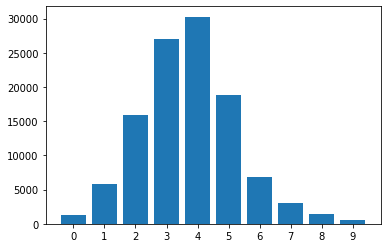

In [ ]:
import matplotlib.pyplot as plt

d={
    '0':[],
    '1':[],
    '2':[],
    '3':[],
    '4':[],
    '5':[],
    '6':[],
    '7':[],
    '8':[],
    '9':[]
}
for i in globalData:
    if 0<=i<0.1:
        d['0'].append(i)
    elif 0.1<=i<0.2:
        d['1'].append(i)
    elif 0.2<=i<0.3:
        d['2'].append(i)
    elif 0.3<=i<0.4:
        d['3'].append(i)
    elif 0.4<=i<0.5:
        d['4'].append(i)
    elif 0.5<=i<0.6:
        d['5'].append(i)
    elif 0.6<=i<0.7:
        d['6'].append(i)
    elif 0.7<=i<0.8:
        d['7'].append(i)
    elif 0.8<=i<0.9:
        d['8'].append(i)
    elif 0.9<=i<=1:
        d['9'].append(i)

height = [len(val) for key,val in d.items()]
bars = ('0', '1', '2', '3', '4','5','6','7','8','9')

y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()